In [280]:
# ### 2変数関数の偏微分 ####
# ## ニューロンの練習
# import numpy as np

# class Neuron:
    
#     def __init__(self, n):
#         self.w = np.random.rand(n)  # setされた次元数
#         self.b = np.random.rand(1)  # [] 1次元の要素をバイアスに与える
#         # 予測値配列
#         self.x11=[]  
#         self.x10=[]
#         self.x01=[]
#         self.x00=[]
        
#         # 誤差配列
#         self.error_x11=[]
#         self.error_x10=[]
#         self.error_x01=[]
#         self.error_x00=[]
        
#     def set_state(self, x, w, b):
#         s0 = (x.dot(self.w))+1*self.b
#         return s0

#     def activate(self, s0):
#         y = 1 / (1 + np.exp(-s0))
#         return y

#     def correct(self):
#         """受け取ったnp_x配列からt値をランダムに生成する(t値は条件下で作る)"""
#         np_x = np.array(np.round(np.random.rand(neuron_num)))
# #         np_x = np.array([1.,1.])
#         if (np_x == 0).any():  # np_xの中にどちら一方でも0なら0を返す
#             t = np.array([0.])
#             if np.allclose(np_x, [1,0]):    # 一致判定
#                 return np_x, t, self.x10, self.error_x10
#             if np.allclose(np_x, [0,1]):    # 一致判定
#                 return np_x, t, self.x01, self.error_x01
#             if np.allclose(np_x, [0,0]):    # 一致判定
#                 return np_x, t, self.x00, self.error_x00
#         else:
#             t = np.array([1.])
#             return np_x, t, self.x11, self.error_x11
        
#     def learn(self, r, y, np_x):
#         """
#         y : 予測値
#         r : ハイパーパラメーター
#         """
# #         learn_list=[]
# #         if np.allclose(np_x, [1,0]):    # 一致判定
# #         for _ in range(200000):
#         for _ in range(1000):
#             x, t, predicted_list, error_list = self.correct()
#             print(x, t)
# #             print("error_list:",len(error_list), "  w:",self.w, "  b:",self.b, "  誤差:", y)
# #             self.w -= r*(y - t)*y*(y-1)*x  # パラメータが更新 
# #             self.b -= r*(y - t)*y*(y-1)    # バイアスが更新
#             self.w -= r*(y - t)*y*(1-y)*x  # パラメータが更新 
#             self.b -= r*(y - t)*y*(1-y)    # バイアスが更新
#             y = self.activate(self.set_state(x, self.w, self.b))
# #             learn_list.append(y)
# #             print("y(予測値)：", y, "　誤差：", t-y)
#             predicted_list.append(y)
#             error_list.append(t-y)  # 0 - 0.02
#         return self.x11, self.x10, self.x01, self.x00 ,self.error_x11, self.error_x10, self.error_x01, self.error_x00
# #         return learn_list  

# if __name__ == '__main__':
#     n = Neuron(2) # 2次元に設定
# #     np_x = np.array([1., 1.])
#     np_x = np.array([0.,1.])
#     r = np.array([0.01])  # ハイパーパラメーター
#     y = n.activate(n.set_state(np_x, n.w, n.b))  # 初回計算
# #     print(n.learn(r , y, np_x))
# #     learn_list = n.learn(r, y, np_x)  # 初回計算結果をもとにして繰り返し学習開始
#     x11,x10,x01,x00,error_x11, error_x10, error_x01, error_x00 = n.learn(r,y,np_x)
# #     print("11:",len(x11),"  10:",len(x10),"  01:",len(x01),"  00:",len(x00),
# #           "  error_x11:",error_x11, "  error_x10:",error_x10, "  error_x01:",error_x01, "  error_x00:",error_x00)

In [302]:
### 2変数関数の偏微分 ####
## ニューロンの練習
import numpy as np

class Neuron:
    
    def __init__(self, n):
        self.w = np.random.rand(n)  # setされた次元数
#         self.b = np.random.rand(1)  # [] 1次元の要素をバイアスに与える
        self.b = 1   # バイアスがランダムや小数点になるだけで収束率がかなり違う
        self.y = None 
        self.s = None 
        self.error_list = []
        self.output_y_max = []
        self.output_y_avg = []
        self.output_y_min = []
        
#     def set_state(self, x, w, b):
#         self.s = (x.dot(self.w))+1*self.b
#         return self.s

#     def activate(self, s):
#         self.y = 1 / (1 + np.exp(-self.s))
#         return self.y

    def correct(self):
        """受け取ったnp_x配列からt値をランダムに生成する(t値は条件下で作る)"""
        np_x = np.array(np.round(np.random.rand(neuron_num)))
        return np_x, 0 if (np_x[np_x== 0.0].size) else 1
    
    def learn(self, r):
        """
        y : 予測値
        r : ハイパーパラメーター
        """
        for i in range(10000):
            x, t = self.correct()
            self.s = (x.dot(self.w))+1*self.b
            self.y = 1 / (1 + np.exp(-self.s))
#             self.y = self.activate(self.set_state(x, self.w, self.b))  # ここで先に計算しておかないと[1.,1.]に限り収束しない
            self.w -= r*(self.y - t)*self.y*(1-self.y)*x  # パラメータが更新 
            self.b -= r*(self.y - t)*self.y*(1-self.y)    # バイアスが更新
            
#             self.y = self.activate(self.set_state(x, self.w, self.b))
            self.error_list.append(np.sqrt(np.power(self.y - t, 2)))
    
            if i % 50 == 0:
                self.output_y_max.append(max(self.error_list))
                self.output_y_avg.append(sum(self.error_list) / len(self.error_list))
                self.output_y_min.append(min(self.error_list))
        # 集めたデータを最大値、平均値、最小値に分ける
#         return self.error_list
        return self.output_y_max, self.output_y_avg, self.output_y_min

if __name__ == '__main__':
    n = Neuron(2) # 2次元に設定
#     np_x = np.array([0.,1.])
    r = np.array([0.1])  # ハイパーパラメーター
#     y = n.activate(n.set_state(np_x, n.w, n.b))  # 初回計算
#     y = 0
    output_y_max, output_y_avg, output_y_min = n.learn(r)
    print(len(output_y_max), len(output_y_avg), len(output_y_min))
#     error_list = n.learn(r)
#     print(len(error_list))

200 200 200


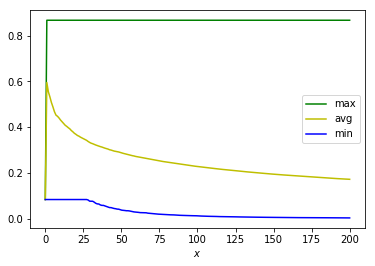

In [303]:
# グラフ
%matplotlib inline
from matplotlib import pyplot as plt
# x = np.linspace(0, 10000, 10000)
# plt.plot(x, error_list, 'b-')
x_max = np.linspace(0,200,200)
x_avg = np.linspace(0,200,200)
x_min = np.linspace(0,200,200)
output_max, = plt.plot(x_max, output_y_max, 'g-', label="max")
output_avg, = plt.plot(x_avg, output_y_avg, 'y-', label="avg")
output_min, = plt.plot(x_min, output_y_min, 'b-', label="min")
plt.legend(handles=[output_max, output_avg, output_min])
plt.title("")
plt.xlabel('$x$')
plt.show()

In [260]:
# グラフ描画
# %matplotlib inline
# from matplotlib import pyplot as plt
# # x = np.linspace(0,1000,10000)
# # plt.plot(x, learn_list, 'b-')

# # x11(b)
# _x11 = np.linspace(0,25042,25042)
# x11_plot, = plt.plot(_x11, x11, 'b-', label="x11_plot")
# x11_error_plot, = plt.plot(_x11, error_x11, 'y-', label='x11_error_plot')
# plt.legend(handles=[x11_plot, x11_error_plot])
# plt.title("x[1.,1.]")
# plt.xlabel('$x$')
# plt.show()

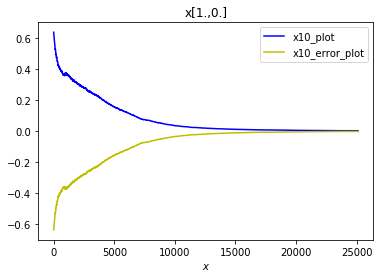

In [162]:
# _x10 = np.linspace(0,25114,25114)
# x10_plot, = plt.plot(_x10, x10, 'b-', label="x10_plot")
# x10_error_plot, = plt.plot(_x10, error_x10, 'y-', label='x10_error_plot')
# plt.legend(handles=[x10_plot, x10_error_plot])
# plt.title("x[1.,0.]")
# plt.xlabel('$x$')
# plt.show()

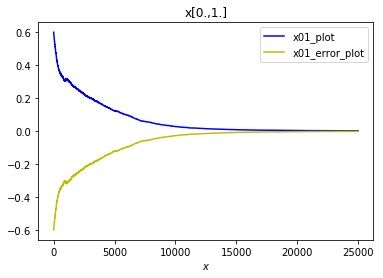

In [164]:
# _x01 = np.linspace(0,25009,25009)
# x01_plot, = plt.plot(_x01, x01, 'b-', label="x01_plot")
# x01_error_plot, = plt.plot(_x01, error_x01, 'y-', label='x01_error_plot')
# plt.legend(handles=[x01_plot, x01_error_plot])
# plt.title("x[0.,1.]")
# plt.xlabel('$x$')
# plt.show()

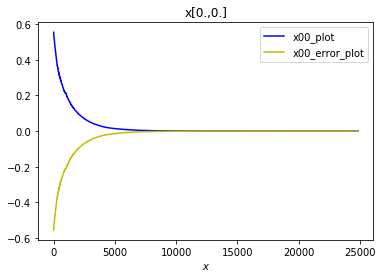

In [165]:
# _x00 = np.linspace(0,24835,24835)
# x00_plot, = plt.plot(_x00, x00, 'b-', label="x00_plot")
# x00_error_plot, = plt.plot(_x00, error_x00, 'y-', label='x00_error_plot')
# plt.legend(handles=[x00_plot, x00_error_plot])
# plt.title("x[0.,0.]")
# plt.xlabel('$x$')
# plt.show()

In [65]:
w = np.array([0.1,0.1])
x = np.array([3,4])
b = 1
s = w.dot(x)+b
s

1.7000000000000002

In [66]:
y = 1/1-np.exp(-s)
y

0.81731647594726542

In [170]:
x = np.array([0.,0.])
print(0 if (x[x == 0.0].size) else 1)

0


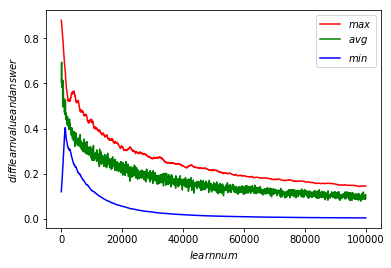

In [279]:
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt

# input num
input_num = 2
# learn loop num
loop = 100000
# result output interval
interval = 50

class Neuron():
    def __init__(self, n):
        # Learning rate
        self._rate = 0.01
        # weight to input values default
        self._weight = np.array(np.round(np.random.rand(n)))
        # bias value
        self._bias = 1.0
        # output value
        self._y = None

    def learn(self, x):
        """Learning
        return: Difference between output value and correct answer value after learning
        """
        # Get input value of correct answer derived from input value
        t = self._get_correct(x)
        # Calculate the state of neuron by input values(x) and weight(_weight) and(_bias)
        s = self._weight.dot(x) + self._bias
        # Calculate the output value by the state of neuron(0~1)
        self._y = 1 / (1 + np.exp(-s))

        # differential　the state of neuron
        diff_y = self._y - t
        # differential　output value
        diff_state = self._y * (1 - self._y)
        #　common differential　 calculation
        diff_common = diff_y * diff_state
        # learning weight
        self._weight -= self._rate * diff_common * x
        # learning bias
        self._bias -= self._rate * diff_common

        # Difference between output value and correct answer value after learning
        return np.sqrt(np.power(self._y - t, 2))

    def _get_correct(self, x):
        """Get input value of correct answer derived from input value
        """
        return 0 if (x[x == 0.0].size) else 1

if __name__ == '__main__':
    n = Neuron(input_num)

    # graph x
    output_x = []
    # graph y
    tmp_y = []
    output_y_max = []
    output_y_avg = []
    output_y_min = []

    for i in range(1, loop+1):
        # input from random　combination　(0,0 or 0,1 or 1,0 or 1,1)
        x = np.array(np.round(np.random.rand(neuron_num)))
        diff = n.learn(x)
        tmp_y.append(diff)
        if i % interval == 0:
            # Average, max, min value for each set number of loops
            output_y_max.append(max(tmp_y))
            output_y_avg.append(sum(tmp_y) / len(tmp_y))
            output_y_min.append(min(tmp_y))
            tmp_y = []
            output_x.append(i)

    # output
    line_max, line_avg, line_min = plt.plot(
        output_x, output_y_max, 'r-', 
        output_x, output_y_avg, 'g-', 
        output_x, output_y_min, 'b-'
    )
    plt.legend((line_max, line_avg, line_min), ('$max$', '$avg$', '$min$'))
    plt.xlabel('$learn num$')
    plt.ylabel('$diff learn value and answer$')
    plt.show()